In [51]:
import torch
import os
import glob
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from typing import Any
import matplotlib.pyplot as plt

# Customized Dataset

In [52]:
class ImageDataset(Dataset):
    def __init__(self, root_dir, transform=None) -> None:
        super().__init__()
        self.root_dir = root_dir
        self.transform = transform
        self.with_makeup_paths = glob.glob(os.path.join(root_dir,"with","*.jpg"))
        self.without_makeup_paths = glob.glob(os.path.join(root_dir,"without","*.jpg"))
    def __len__(self) -> int:
        return len(self.with_makeup_paths)
    def __getitem__(self, index) -> Any:
        with_makeup_path = self.with_makeup_paths[index]
        without_makeup_path = self.without_makeup_paths[index]
        
        with_makeup_image = Image.open(with_makeup_path)
        without_makeup_image = Image.open(without_makeup_path)
        
        if self.transform:
            with_makeup_image = self.transform(with_makeup_image)
            without_makeup_image = self.transform(without_makeup_image)
            
        return [with_makeup_image, without_makeup_image]
        

# Model

# Customized Loss

# Train

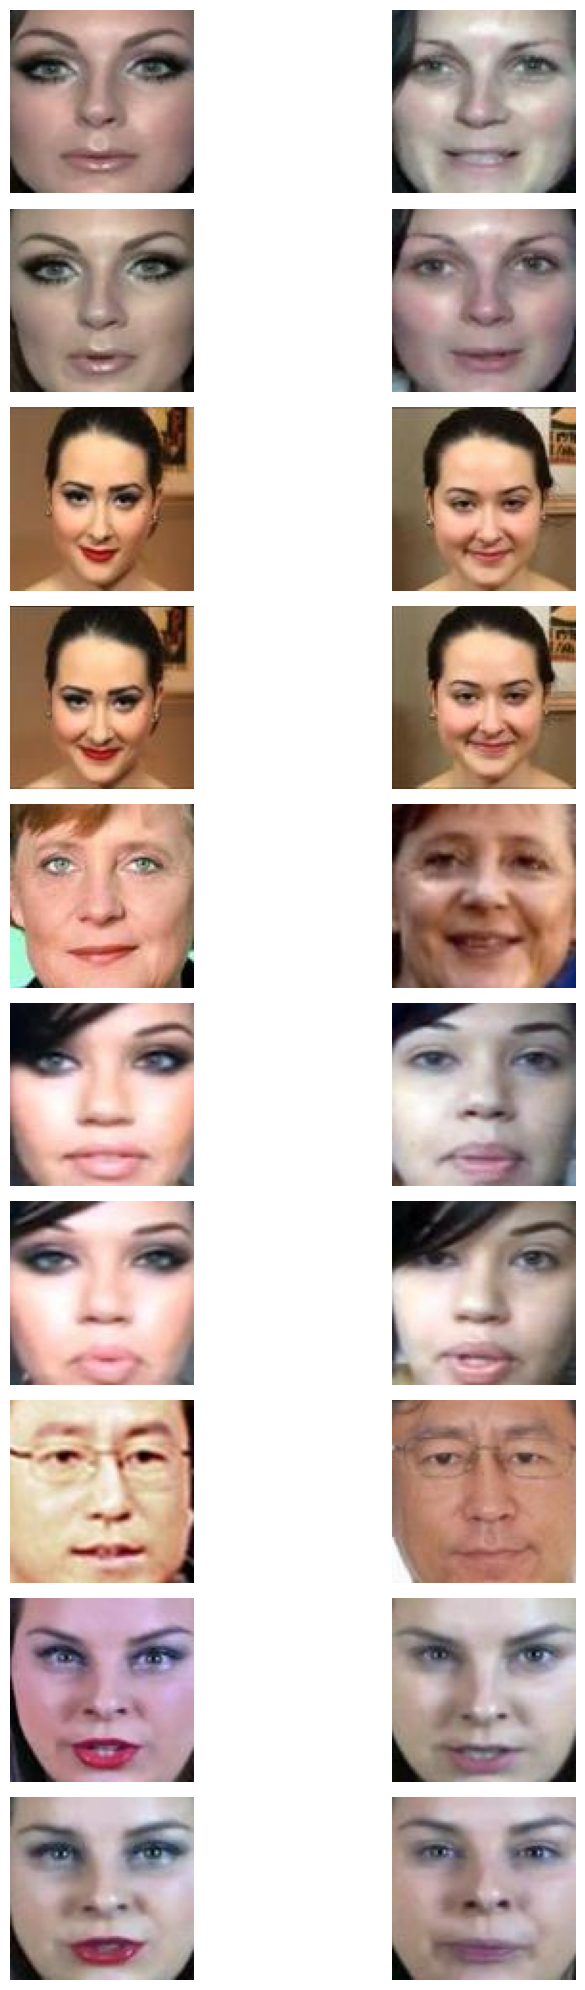

In [53]:
root_dir = os.path.join(os.getcwd(), "dataset")
transform = transforms.Compose([
    transforms.Resize([96,96]),
    transforms.ToTensor(),
    # transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

dataset = ImageDataset(root_dir, transform)
fig, axes = plt.subplots(10, 2, figsize=(10, 20))
for i in range(10):
    with_image = transforms.ToPILImage()(dataset[i][0])
    without_image = transforms.ToPILImage()(dataset[i][1])
    axes[i,0].imshow(with_image)
    axes[i,0].axis("off")
    axes[i,1].imshow(without_image)
    axes[i,1].axis("off")
plt.tight_layout()    
plt.show()